<a href="https://colab.research.google.com/github/giuliovv/tfest/blob/main/examples/tfest_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install tfest

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir("..")
import tfest

from scipy import signal

In [3]:
s1 = signal.lti([1], [1, 1])

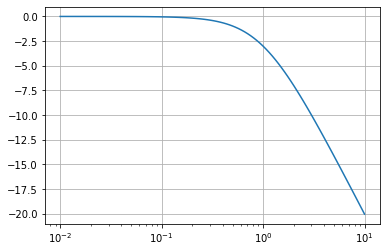

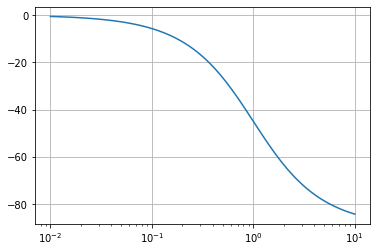

In [4]:
w, mag, phase = s1.bode()
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.grid()
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.grid()
plt.show()

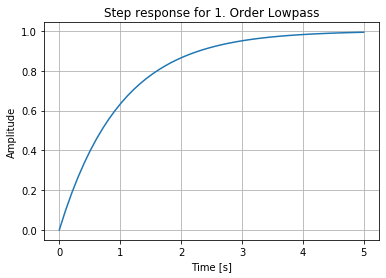

In [5]:
t = np.linspace(0, 5, num=50)
u = np.ones_like(t)
tout, y, x = signal.lsim(s1, u, t)
plt.plot(t, y)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for 1. Order Lowpass')
plt.grid()

In [6]:
te = tfest.tfest(u, y)

In [10]:
te.estimate(nzeros=0, npoles=1, method="h1", time=5)

Optimization terminated successfully.
         Current function value: 0.416816
         Iterations: 50
         Function evaluations: 90


 final_simplex: (array([[ 1.13101523, -0.00299171,  1.13830353],
       [ 1.13139258, -0.00200276,  1.13867963],
       [ 1.13035032, -0.00184041,  1.13763013],
       [ 1.13110255, -0.00324892,  1.138406  ]]), array([0.41681607, 0.41685455, 0.41690152, 0.4169135 ]))
           fun: 0.41681607084597116
       message: 'Optimization terminated successfully.'
          nfev: 90
           nit: 50
        status: 0
       success: True
             x: array([ 1.13101523, -0.00299171,  1.13830353])

In [ ]:
te.get_transfer_function()

TransferFunctionContinuous(
array([0.8439614]),
array([1.        , 1.06133686]),
dt: None
)

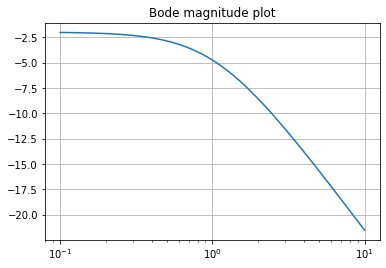

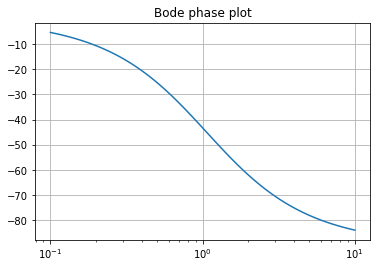

In [ ]:
te.plot_bode()

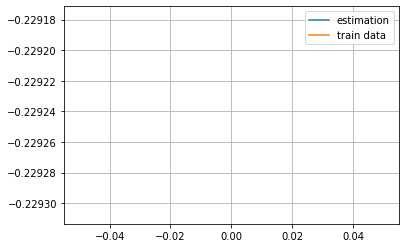

In [ ]:
te.plot()